# Precedent Based Reasoning

In [1]:
from enum import Enum, auto
import random
from itertools import chain, combinations, product
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns
import numpy as np
def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))

## Factors and Reasons 



In [2]:

class Side(Enum):
    
    P = 'P'  # plaintiff
    D = 'D'  # defendant
    
    def __str__(self):
        return str(self.value)

    def other(self): 
        '''
        The other side (this assumes that there are only two sides)
        '''
        return [member for s,member in Side.__members__.items() if s != self.value][0]

    
class Factor(object): 
    '''
    A factor consists of a name and the side it supports
    '''
    def __init__(self, name, side): 
        self.side = side
        self.name = name
    
    def side(self): 
        return self.side
    
    def __str__(self): 
        return str(self.name) + ":" + str(self.side)
    
    def __eq__(self, other): 
        return self.side == other.side and self.name == other.name
    
    def __ne__(self, other): 
        return self.side != other.side or self.name != other.name
    
    def __hash__(self): 
        return hash(str(self.name) + ":" + str(self.side))

    
def factors_to_str(fs): 
    """Given a list of factors, return a string to display the factors"""
    return "{" + ", ".join(list(map(str,fs))) + "}"

    
class Reason(object): 
    '''
    A reason is a set of factors all supporting the same side
    '''
    def __init__(self, factors = None, side = None, factors_strs = None): 
        
        factors = self.factors_from_strs(factors_strs) if factors_strs is not None else factors
        
        assert len(factors) == 0 or len(list(set([f.side for f in factors]))) == 1, f"All factors {list(map(str,factors))} must support the same side to form a reason."
        assert side is None or all([f.side == side for f in factors]), f"The side {side} doesn't match the side of the set of factors."
        
        self.factors = factors
        
        # for the empty reason, the side must be set explicitly
        self.side = side if len(factors) == 0 else factors[0].side 
                
    def other_side(self): 
        return self.side.other()
    
    def is_empty(self): 
        return len(self.factors) == 0
    
    def factors_from_strs(self, factors_strs): 
        
        return [Factor(fstr.split(":")[0], Side.P) if fstr.split(":")[1] == 'P' else Factor(fstr.split(":")[0],Side.D) for fstr in factors_strs]
    
    def subreasons(self, only_nonempty = True): 
        # return all the subreasons of the current reason. 
        # if only_nonempty is True, then only return nonempty factors
        return [Reason(fs, side=self.side) for fs in powerset(self.factors) if not only_nonempty or len(fs) > 0]
            
    def __eq__(self, other):
        return self.side == other.side and all([f in self.factors for f in other.factors]) and all([f in other.factors for f in self.factors])

    def __le__(self, other):
        return self.side == other.side and all([f in other.factors for f in self.factors])

    def __lt__(self, other):
        return self.__le__(other) and not self.__eq__(other)

    def __ge__(self, other):
        return self.side == other.side and all([f in self.factors for f in other.factors])

    def __gt__(self, other):
        return self.__ge__(other) and not self.__eq__(other)

    def __str__(self): 
        return "{" + ",".join([str(f) for f in self.factors]) + "}" if len(self.factors) > 0 else  "{:" + str(self.side) + "}"
    
    def __hash__(self): 
        return hash(tuple([str(f) for f in self.factors])) if len(self.factors) > 0 else hash(tuple([f":{str(self.side)}"]))


def generate_fact_situations(num_fact_situations, num_factors_for_D = 5, num_factors_for_P = 5): 
    '''
    Create num_fact_situations fact situations.   Start with num_factors_for_D factors for D and num_factors_for_P factors for P, 
    then create fact situations with different numbers of factors for D and factors for P. 
    '''
    
    factors_for_D = [Factor(n, Side.D) for n in range(num_factors_for_D)]
    factors_for_P = [Factor(n, Side.P) for n in range(num_factors_for_P)]

    fact_situations = list()
    
    for nf in range(num_fact_situations): 

        num_D_factors = random.choice(range(1, num_factors_for_D+1))
        num_P_factors = random.choice(range(1, num_factors_for_P+1))
    
        fact_situations.append(random.sample(factors_for_D, num_D_factors) + random.sample(factors_for_P, num_P_factors))
        
    return fact_situations

r =  Reason([Factor(0, Side.P), Factor(1, Side.P)])
r0 = Reason([], side=Side.P)
r1 = Reason([Factor(0, Side.P), Factor(1, Side.P),  Factor(2, Side.P)])
r2 = Reason([Factor(0, Side.D), Factor(1, Side.D)])
print(r)
print(r0)
print(f"{r0} == {r} is {r0 == r}")
print(f"{r0} <= {r} is {r0 <= r}")
print(f"{r0} <= {r2} is {r0 <= r2}")
print(f"{r} <= {r1} is {r <= r1}")
print(f"{r} < {r1} is {r < r1}")
print(f"{r} == {r1} is {r == r1}")
print(f"{r} == {r2} is {r <= r2}")

print(f"\nthe nonempty subreasons of {r1} are")
for sr in list(map(str,r1.subreasons())): 
    print(sr)

print(f"\nthe subreasons of {r1} are")
for sr in list(map(str,r1.subreasons(only_nonempty=False))): 
    print(sr)


fact_situations = generate_fact_situations(10)
print("\nCreate 10 fact situation")
for fs in fact_situations:
    print(factors_to_str(fs))

possible_facts = list()
for fs in fact_situations: 
    possible_facts = list(set(possible_facts + fs))
         
print(list(map(str,possible_facts)))

r3 = Reason(factors_strs=["0:P", "1:P"])
print(r3)




{0:P,1:P}
{:P}
{:P} == {0:P,1:P} is False
{:P} <= {0:P,1:P} is True
{:P} <= {0:D,1:D} is False
{0:P,1:P} <= {0:P,1:P,2:P} is True
{0:P,1:P} < {0:P,1:P,2:P} is True
{0:P,1:P} == {0:P,1:P,2:P} is False
{0:P,1:P} == {0:D,1:D} is False

the nonempty subreasons of {0:P,1:P,2:P} are
{0:P}
{1:P}
{2:P}
{0:P,1:P}
{0:P,2:P}
{1:P,2:P}
{0:P,1:P,2:P}

the subreasons of {0:P,1:P,2:P} are
{:P}
{0:P}
{1:P}
{2:P}
{0:P,1:P}
{0:P,2:P}
{1:P,2:P}
{0:P,1:P,2:P}

Create 10 fact situation
{1:D, 4:D, 0:D, 2:D, 3:D, 3:P, 4:P}
{4:D, 0:D, 1:D, 1:P, 0:P}
{4:D, 3:D, 0:D, 1:D, 2:D, 3:P, 2:P, 4:P, 1:P}
{3:D, 4:D, 1:D, 0:D, 2:D, 3:P, 2:P, 0:P, 1:P, 4:P}
{4:D, 0:D, 2:D, 3:D, 2:P, 3:P, 0:P, 1:P}
{0:D, 2:D, 3:D, 4:D, 1:D, 0:P, 1:P}
{3:D, 4:D, 0:D, 1:D, 3:P, 0:P, 1:P, 2:P, 4:P}
{1:D, 2:D, 3:D, 4:P, 0:P, 1:P}
{4:D, 4:P, 0:P}
{0:D, 0:P, 2:P, 4:P, 1:P}
['1:P', '4:P', '4:D', '0:D', '2:D', '0:P', '1:D', '3:D', '2:P', '3:P']
{0:P,1:P}


## Rule

In [3]:
class Rule(object): 
    
    def __init__(self, reason, exceptions): 
        
        assert all([reason.side != nr.side for nr in exceptions]), f"{reason} must favor a different side than each negative reason {','.join(list(map(str,exceptions)))}"
        
        self.reason = reason  # the reason in favor of the winning side
        self.exceptions = exceptions  # the reasons that cannot be present in order to apply the rule
        
    @property
    def premise(self): 
        '''return the premise of the rule'''
        
        return self.reason
    
    @property
    def winning_side(self): 
        '''returns the winning side of the rule'''
        
        return self.reason.side

    def ruling(self, fact_sit): 
        '''
        return the ruling in the given fact situation; and return None if the rule doesn't decide the case one way or the other
        '''
        r_P = Reason([f for f in fact_sit if f.side == Side.P], side = Side.P)
        r_D = Reason([f for f in fact_sit if f.side == Side.D], side = Side.D)
        
        if self.reason <= r_P and all([not e <= r_D for e in self.exceptions]): 
            return Side.P
        elif self.reason <= r_D and all([not e <= r_P for e in self.exceptions]): 
            return Side.D
        else: 
            None

    def derived_prefers(self, u, v):
        # return True if u is preferred to v according to the rule and False otherwise
        
        if self.reason <= u and all([not e <= v for e in self.exceptions]): 
            return True
        return False
    
    def __str__(self):
        exceptions = ", " + ", ".join([f"not-{r}" for r in self.exceptions]) if len(self.exceptions) > 0 else "" 
        return f"{self.reason}{exceptions} --> {self.reason.side}"

    

## Priority Ordering

In [4]:
class PriorityOrdering(object): 
    
    def __init__(self, basic_prefs = None): 
        
        # a set of tuples (u,v), where (u,v) means that u > v (u is strictly preferred to v)
        self.basic_prefs = [] if basic_prefs is None else basic_prefs 
                
    def derived_prefers(self, u, v, return_basic_pref_reason = False):  
        '''
        u and v are both reasons
        returns True when u is preferred to v
        '''
        for a,b in self.basic_prefs: 
            # a > b
            if u >= a and b >= v: 
                return True if not return_basic_pref_reason else (True, (a, b))
                
        return False if not return_basic_pref_reason else (False, None)

    def conditional_prefers(self, u, v, basic_prefs, return_basic_pref_reason = False): 
        new_basic_prefs = basic_prefs
        for a, b in self.basic_prefs: 
            if not any([b >= c and d >= a for c, d in basic_prefs]): 
                new_basic_prefs.append((a, b))
        
        for a,b in new_basic_prefs: 
            if u >= a and b >= v: 
                return True if not return_basic_pref_reason else (True, (a, b))
        return False if not return_basic_pref_reason else (False, None)
                

    def add_basic_pref(self, u, v, allow_inconsistent_preference = False):  # u is preferred to v
        
        assert u.side != v.side, f"preferences must be between reasons of different sides: {u} and {v}"
        
        if allow_inconsistent_preference: 
            self.basic_prefs.append((u, v))
        else:
            if not self.derived_prefers(v, u): 
                self.basic_prefs.append((u,v))
                
    def has_basic_pref(self, a, b): 
        return (a, b) in self.basic_prefs
    
    def reset(self): 
        self.basic_prefs = []

        
    def derived_lex_prefers(self, u, v, other_pref = None):  
        '''
        u and v are both reasons
        returns True when u is preferred to v
        '''
        
        if other_pref.prefers(u, v):
            return True
        elif not other_pref.derived_prefers(v, u):
            for a,b in self.basic_prefs: 
                # a > b
                if u >= a and b >= v: 
                    return True  
        return False

    def distance(self, other_priority_ordering): 
        """returns the distance to the other_priority_ordering based on the number of disagreements"""
        
        return sum([other_priority_ordering.derived_prefers(b, a) 
                    for a, b in self.basic_prefs]) #+ 0.5 * sum([not other_priority_ordering.derived_prefers(b, a) and not other_priority_ordering.derived_prefers(a, b)
                                                                #for a, b in self.basic_prefs])
    
    def __str__(self):
    
        return "\n".join([f"{a} > {b}" for a,b in self.basic_prefs])


In [5]:
po = PriorityOrdering()
print(po)

print(po.derived_prefers(Reason([], Side.P), Reason([], Side.D)))
po2 = PriorityOrdering()
po2.add_basic_pref(Reason([], Side.P), Reason([], Side.D))
po3 = PriorityOrdering()
po3.add_basic_pref(Reason([], Side.D), Reason([], Side.P))
print(po.distance(po))
print(po.distance(po2))
print(po2.distance(po))
print(po2.distance(po3))
print(po3.distance(po2))


False
0
0
0
1
1


## Case, Case Base, Court

In [6]:
class Case(object):
    
    def __init__(self, fact_sit, ruling = None): 
        
        self.fact_sit = fact_sit
        self.ruling = ruling
        
    @property
    def winning_side(self): 
        return self.ruling.side
    
    @property
    def rule_premise(self): 
        return self.ruling
    
    @property
    def rule(self): 
        return (self.ruling, self.ruling.side)
     
    @property
    def losing_factors(self): 
        
        other_side = self.ruling.side.other()
        
        return [f for f in self.fact_sit if f.side == other_side]

    def strongest_reason(self, side): 
        
        return Reason([f for f in self.fact_sit if f.side == side])

    def prefers(self, u, v): 
        
        return  u >= self.ruling and self.strongest_reason(v.side) >= v
    
    def set_ruling(self, reason): 
        
        if all([f in self.fact_sit for f in reason.factors]): 
            self.ruling = reason
        else: 
            print("ERROR: Reason not a subset of the fact situation")
            
    def __str__(self): 
        if self.ruling is None:
            return "<" + "{" + ", ".join(list(map(str,self.fact_sit))) + "}, No Ruling>" 
        else:
            return "<" + "{" + ", ".join(list(map(str,self.fact_sit))) + "}, " + str(self.ruling) + " --> " + str(self.winning_side) + ">"
        
class CaseBase(object):
    
    def __init__(self, cases = None): 
        
        self.cases = cases if cases is not None else list()
        
        self._preference = PriorityOrdering()
        #self._rules = Rules()
        
        self._rules = list()
   
    @property    
    def basic_prefs(self): 
        return self._preference.basic_prefs
    
    @property    
    def priority_ordering(self): 
        return self._preference

    def cases_for_side(self, side): 
        
        return [c for c in self.cases if c.winning_side == side]
    
    def defeators(self, case): 
        #print("IN defeaters with ", str(case))
        #print([str(c) for c in self.cases_for_side(case.winning_side.other()) if c.prefers(c.rule_premise, case.rule_premise) and case.prefers(case.rule_premise, c.rule_premise)])
        return [c for c in self.cases_for_side(case.winning_side.other()) if c.prefers(c.rule_premise, case.rule_premise) and case.prefers(case.rule_premise, c.rule_premise)]
    
    def supporters(self, case): 
        
        #print("IN supporters with ", str(case))
        #print([str(c) for c in self.cases_for_side(case.winning_side) if c.rule_premise <= case.rule_premise and case.strongest_reason(case.winning_side.other()) <= c.strongest_reason(case.winning_side.other)])
        return [c for c in self.cases_for_side(case.winning_side) if c.rule_premise <= case.rule_premise and case.strongest_reason(case.winning_side.other()) <= c.strongest_reason(case.winning_side.other)]

    def derived_prefers(self, u, v): 
        return self._preference.derived_prefers(u, v)
    
    def prefers(self, u, v): 
        return any([c.prefers(u, v) for c in self.cases])
    
    def is_obligatory(self, fact_sit, side): 
        """return True if it is obligatory to rule for side"""
        
        #print([str(Case(fact_sit, ruling=Reason(fs, side=side.other()))) for fs in powerset([f for f in fact_sit if f.side == side.other()]) if len(fs) > 0])
        possible_decisions = [Case(fact_sit, ruling=Reason(fs, side=side.other())) for fs in powerset([f for f in fact_sit if f.side == side.other()])]
        return all([len(self.defeators(c)) != 0 and len(self.supporters(c)) == 0 for c in possible_decisions])
    
    def generate_basic_preferences(self): 
        """Generate the preferences for the case base"""
        self._preference.reset()
        for c in self.cases: 
            self._preference.add_basic_pref(c.rule_premise, Reason(c.losing_factors, side=c.winning_side.other()))

    def generate_rules(self): 
        self._rules = list()
        exceptions_P = list()
        exceptions_P = list()
        for c in self.cases: 
            if c.winning_side == Side.P: 
                exceptions_P.append(c.reason)
                
    def add(self, c): 
        
        self.cases.append(c)
        
        # regenerate the preferences
        self.generate_basic_preferences()
        
#     def generate_rules(self): 
        
#         self._rules.reset()
        
#         exceptions_for_P = list()
#         exceptions_for_D = list()
#         for c in self.cases: 
            
#             if c.winning_side = Side.P: 
#                 exceptions_for_P.append(s.rule_premise)
    
    
c = Case([Factor(0, Side.P), Factor(0, Side.D)] )
print(c)
#c.set_ruling(Reason([Factor(0, Side.P)]))
c = Case([Factor(0, Side.P), Factor(0, Side.D)], ruling=Reason([Factor(0, Side.P)], side=Side.P) )
c.set_ruling(Reason([Factor(0, Side.D)], side=Side.D) )
print(c)

print(factors_to_str(c.losing_factors))

<{0:P, 0:D}, No Ruling>
<{0:P, 0:D}, {0:D} --> D>
{0:P}


In [7]:
f1_P = Factor(1, Side.P)
f2_P = Factor(2, Side.P)
f1_D = Factor(1, Side.D)
f2_D = Factor(2, Side.D)

c4 = Case([f1_P, f1_D], ruling=Reason([f1_P]))
c5 = Case([f1_P, f1_D, f2_D], ruling=Reason([f1_D]))
c6 = Case([f1_P, f2_P, f1_D])
print(c4)
print(c5)
print(c6)

case_base = CaseBase()
print("\n-----\n")

case_base.add(c4)
fact_sit = [f1_P, f2_P, f1_D]

print("CASES")
for c in case_base.cases:
    print(c)
print("fact sit ", factors_to_str(fact_sit))
print(f"O({factors_to_str(fact_sit)}, P)", case_base.is_obligatory(fact_sit, Side.P))
print(f"O({factors_to_str(fact_sit)}, D)", case_base.is_obligatory(fact_sit, Side.D))
case_base.add(c5)
print("\n-----\n")

print("CASES")
for c in case_base.cases:
    print(c)
print(f"O({factors_to_str(fact_sit)}, P)", case_base.is_obligatory(fact_sit, Side.P))
print(f"O({factors_to_str(fact_sit)}, D)", case_base.is_obligatory(fact_sit, Side.D))


<{1:P, 1:D}, {1:P} --> P>
<{1:P, 1:D, 2:D}, {1:D} --> D>
<{1:P, 2:P, 1:D}, No Ruling>

-----

CASES
<{1:P, 1:D}, {1:P} --> P>
fact sit  {1:P, 2:P, 1:D}
O({1:P, 2:P, 1:D}, P) True
O({1:P, 2:P, 1:D}, D) False

-----

CASES
<{1:P, 1:D}, {1:P} --> P>
<{1:P, 1:D, 2:D}, {1:D} --> D>
O({1:P, 2:P, 1:D}, P) True
O({1:P, 2:P, 1:D}, D) False


In [8]:
class Court(object): 
    
    def __init__(self, 
                 basic_prefs = None): 
        

        _basic_prefs = [] if basic_prefs is None else basic_prefs

        self._preference = PriorityOrdering(basic_prefs = basic_prefs)
        
    @property
    def preferences(self): 
        return self._preference
    
    def distance(self, other_priority_ordering): 
        return self._preference.distance(other_priority_ordering)
    
    def prefers(self, u, v): 

        return self._preference.derived_prefers(u, v)
    
    def add_basic_pref(self, u, v): 
        
        self._preference.add_basic_pref(u, v)
    
    def reset(self): 
        
        c._preference.reset()

#     def find_potential_reasons(self, factors):
        
#         # return all reasons that are subsets of factors that could potentially be preferred to another reason 
#         pot_reasons = list()
#         for a, b in self._preference.basic_prefs: 
#             r_factors = Reason([f for f in factors if f.side == a.side], side = a.side)
#             if a <= r_factors: 
#                 for fs in powerset([f for f in factors if f not in a.factors and f.side == a.side]): 
#                     r = Reason(a.factors + list(fs), side = a.side)
#                     pot_reasons.append(r)
#                     #yield r
                    
#         return pot_reasons

#     def ranking_conflicts(self, r1, r2, precedent = None): 
#         ## returns True if r1 > r2 conficts with preferences
        
#         for r in self.find_potential_reasons(r2.factors): 
#             if self.prefers(r, r1, precedent = precedent): 
#                 return True
#         return False

#     def ranking_conflicts(self, r1, r2, precedent = None): 
#         ## returns True if r1 > r2 conficts with preferences
        
#         for r in self.find_potential_reasons(r2.factors): 
#             if self.conditional_prefers(r, r1, precedent = precedent): 
#                 return True
#         return False

    def decide_case(self, c, basic_prefs = None): 
        
        basic_prefs = list() if basic_prefs is None else basic_prefs
        factors_P = [f for f in c.fact_sit if f.side == Side.P]
        factors_D = [f for f in c.fact_sit if f.side == Side.D]
        
        r_P = Reason(factors_P, side=Side.P)
        r_D = Reason(factors_D, side=Side.D)
        
        pot_decisions = list()  # the potential decisions
        
        for r in r_P.subreasons():
            if not self._preference.conditional_prefers(r_D, r, basic_prefs): 
                pot_decisions.append(r)
        
        for r in r_D.subreasons():
            if not self._preference.conditional_prefers(r_P, r, basic_prefs): 
                pot_decisions.append(r)
        
        if len(pot_decisions) == 0: 
            # this shouldn't happen! 
            print("No decision is possible")
            print("Case", c)
            print("Precedent", [(str(bp[0]), str(bp[1])) for bp in basic_prefs])
            print("Preferences", self)
            return None
        
        return random.choice(pot_decisions)

    def __str__(self): 
        return str(self._preference)


In [9]:
for fs in generate_fact_situations(2): 
    print(factors_to_str(fs))

{4:D, 3:D, 1:D, 2:D, 0:D, 3:P, 0:P, 4:P}
{1:D, 0:D, 4:D, 3:D, 3:P, 1:P, 4:P}


In [10]:
class Society(object): 
    
    def __init__(self, 
                 num_courts, 
                 num_fact_situations, 
                 max_num_basic_prefs = 5): 
        
        self.fact_situations = generate_fact_situations(num_fact_situations)
        self.all_factors = self._all_factors

        self.num_courts = num_courts
        self.max_num_basic_prefs = max_num_basic_prefs
        self.courts = []
        
        self.priority_ordering = PriorityOrdering()
        
        self.case_base = CaseBase()
        
    @property
    def _all_factors(self): 
        poss_facts = list()
        for fs in fact_situations: 
            poss_facts = list(set(poss_facts + fs))

        return poss_facts

    def initialize_courts(self, max_num_basic_prefs = None): 
        '''
        Initialize the courts with basic preferences (assumes that the courts have been )
        '''
        
        max_num_basic_prefs = self.max_num_basic_prefs if max_num_basic_prefs is None else max_num_basic_prefs
        
        factors_P = [f for f in self.all_factors if f.side == Side.P]
        factors_D = [f for f in self.all_factors if f.side == Side.D]
        
        courts = list()
        
        for nc in range(self.num_courts): 

            num_basic_prefs = random.choice(range(1, max_num_basic_prefs+1))
            basic_prefs = list()
            
            for _ in range(num_basic_prefs): 
                
                reason_P = Reason(random.sample(factors_P, 
                                                random.choice(range(1,len(factors_P) + 1))), side=Side.P)
                reason_D = Reason(random.sample(factors_D, 
                                                random.choice(range(1,len(factors_D) + 1))), side=Side.D)

                if random.choice([True, False]): 
                    basic_prefs.append((reason_P, reason_D))
                else:
                    basic_prefs.append((reason_D, reason_P))
            courts.append(Court(basic_prefs = basic_prefs))
        
        self.courts = courts
            

    def generate_case_base(self, verbose = False):
        
        self.priority_ordering.reset()
        for fact_sit in tqdm(self.fact_situations): 
            
            if verbose: 
                print(f"The fact situation: {factors_to_str(fact_sit)}")
            
            # define case
            current_case = Case(fact_sit)
            
            # choose a court
            current_court = random.choice(self.courts)
            
            if verbose: 
                print(f"The current court:\n {str(current_court)}")
                print(f"\nThe constraints:\n {str(self.case_base._preference)}")
            # the court decides the ranking
            
            winning_reason = current_court.decide_case(current_case, basic_prefs = self.case_base.basic_prefs)
            
            current_case.set_ruling(winning_reason)
            
            if verbose: 
                print("")
                losing_reason = Reason(current_case.losing_factors)
                court_pref, court_basic_pref = current_court._preference.derived_prefers(winning_reason, Reason(current_case.losing_factors), return_basic_pref_reason = True)
                if court_pref: 
                    print(f"The court prefers {winning_reason} to {losing_reason} given the basic preference {court_basic_pref[0]} > {court_basic_pref[1]}")
                else:
                    print(f"The court does not prefer {winning_reason} to {losing_reason}")
                    
                constraint_pref, constraint_basic_pref = self.case_base._preference.derived_prefers(winning_reason, Reason(current_case.losing_factors), return_basic_pref_reason = True)
                if court_pref: 
                    print(f"The case base prefers {winning_reason} to {losing_reason} given the basic preference {court_basic_pref[0]} > {court_basic_pref[1]}")
                else:
                    print(f"The case base does not prefer {winning_reason} to {losing_reason}")
                    
                print(f"The decision:\n {str(current_case)}\n\n")
                print("\n-----\n")

            self.case_base.add(current_case)
                        
    def distances(self): 
        
        dist_to_others = {c: [c.distance(c_other.preferences) for c_other in self.courts] 
                       for c in self.courts}
        
        dist_to_case_base = {c: c.distance(self.case_base.priority_ordering) for c in self.courts}
            
            
        return dist_to_others, dist_to_case_base
                


In [ ]:
class Group(object): 
    
    def __init__(self, 
                 num_members, 
                 num_fact_situations, 
                 max_num_basic_prefs = 5): 
        
        
        self.fact_situations = generate_fact_situations(num_fact_situations)
        self.all_factors = self._all_factors

        self.num_courts = num_courts
        self.max_num_basic_prefs = max_num_basic_prefs
        self.courts = []
        
        self.priority_ordering = PriorityOrdering()
        
        self.case_base = CaseBase()
        
    @property
    def _all_factors(self): 
        poss_facts = list()
        for fs in fact_situations: 
            poss_facts = list(set(poss_facts + fs))

        return poss_facts

    def initialize_courts(self, max_num_basic_prefs = None): 
        '''
        Initialize the courts with basic preferences (assumes that the courts have been )
        '''
        
        max_num_basic_prefs = self.max_num_basic_prefs if max_num_basic_prefs is None else max_num_basic_prefs
        
        factors_P = [f for f in self.all_factors if f.side == Side.P]
        factors_D = [f for f in self.all_factors if f.side == Side.D]
        
        courts = list()
        
        for nc in range(self.num_courts): 

            num_basic_prefs = random.choice(range(1, max_num_basic_prefs+1))
            basic_prefs = list()
            
            for _ in range(num_basic_prefs): 
                
                reason_P = Reason(random.sample(factors_P, 
                                                random.choice(range(1,len(factors_P) + 1))), side=Side.P)
                reason_D = Reason(random.sample(factors_D, 
                                                random.choice(range(1,len(factors_D) + 1))), side=Side.D)

                if random.choice([True, False]): 
                    basic_prefs.append((reason_P, reason_D))
                else:
                    basic_prefs.append((reason_D, reason_P))
            courts.append(Court(basic_prefs = basic_prefs))
        
        self.courts = courts
            

    def generate_case_base(self, verbose = False):
        
        self.priority_ordering.reset()
        for fact_sit in tqdm(self.fact_situations): 
            
            if verbose: 
                print(f"The fact situation: {factors_to_str(fact_sit)}")
            
            # define case
            current_case = Case(fact_sit)
            
            # choose a court
            current_court = random.choice(self.courts)
            
            if verbose: 
                print(f"The current court:\n {str(current_court)}")
                print(f"\nThe constraints:\n {str(self.case_base._preference)}")
            # the court decides the ranking
            
            winning_reason = current_court.decide_case(current_case, basic_prefs = self.case_base.basic_prefs)
            
            current_case.set_ruling(winning_reason)
            
            if verbose: 
                print("")
                losing_reason = Reason(current_case.losing_factors)
                court_pref, court_basic_pref = current_court._preference.derived_prefers(winning_reason, Reason(current_case.losing_factors), return_basic_pref_reason = True)
                if court_pref: 
                    print(f"The court prefers {winning_reason} to {losing_reason} given the basic preference {court_basic_pref[0]} > {court_basic_pref[1]}")
                else:
                    print(f"The court does not prefer {winning_reason} to {losing_reason}")
                    
                constraint_pref, constraint_basic_pref = self.case_base._preference.derived_prefers(winning_reason, Reason(current_case.losing_factors), return_basic_pref_reason = True)
                if court_pref: 
                    print(f"The case base prefers {winning_reason} to {losing_reason} given the basic preference {court_basic_pref[0]} > {court_basic_pref[1]}")
                else:
                    print(f"The case base does not prefer {winning_reason} to {losing_reason}")
                    
                print(f"The decision:\n {str(current_case)}\n\n")
                print("\n-----\n")

            self.case_base.add(current_case)
                        
    def distances(self): 
        
        dist_to_others = {c: [c.distance(c_other.preferences) for c_other in self.courts] 
                       for c in self.courts}
        
        dist_to_case_base = {c: c.distance(self.case_base.priority_ordering) for c in self.courts}
            
            
        return dist_to_others, dist_to_case_base
                


In [11]:
num_courts = 5
num_fact_situations = 10
max_num_basic_prefs = 7

soc = Society(num_courts,
              num_fact_situations, 
              max_num_basic_prefs = max_num_basic_prefs
             )

soc.initialize_courts()

for cidx, c in enumerate(soc.courts): 
    print(f"Court {cidx}")
    print(c)
    print("")
    
print(f"{len(soc.fact_situations)} Fact Situations")

soc.generate_case_base(verbose = True)

for c in soc.case_base.cases: 
    print(c)
    
for c in soc.courts: 
    print(c.distance(c.preferences))
    print()
print("\n")
dist_to_others, dist_to_case_base = soc.distances()

for c_idx, c in enumerate(soc.courts): 
    print(f"Court {c_idx}: {dist_to_others[c]} (Avg {np.average(dist_to_others[c])})")
    print(f"\tDistance to Case Base: {dist_to_case_base[c]}")
    print()

Court 0
{0:P} > {2:D,0:D,1:D,4:D,3:D}
{3:D,0:D,4:D,2:D} > {1:P,4:P,0:P}

Court 1
{1:P,2:P,0:P,3:P} > {3:D,2:D}
{3:P} > {2:D,1:D,0:D,3:D}

Court 2
{4:D,2:D,3:D} > {3:P}
{4:D,1:D,2:D,3:D} > {3:P,1:P,0:P}
{3:D} > {4:P,0:P}
{4:D,1:D,0:D,2:D} > {2:P,4:P,3:P}
{2:D,1:D,3:D} > {4:P,3:P,2:P,1:P}

Court 3
{4:P,2:P} > {2:D,3:D,0:D,1:D}
{4:D} > {0:P}
{2:D} > {1:P,4:P,3:P,2:P,0:P}
{1:P,4:P} > {1:D,3:D}

Court 4
{3:D,1:D} > {1:P,2:P,4:P,3:P,0:P}
{1:P,2:P,3:P,0:P,4:P} > {2:D,0:D,4:D,3:D,1:D}
{2:D,3:D,0:D,4:D,1:D} > {1:P,2:P,0:P}
{0:D,3:D,2:D} > {2:P,1:P}
{3:D,2:D,1:D,0:D} > {4:P,1:P}
{1:D,2:D,3:D,4:D,0:D} > {1:P}

10 Fact Situations


  0%|          | 0/10 [00:00<?, ?it/s]

The fact situation: {3:D, 2:D, 4:D, 0:D, 1:D, 0:P, 3:P, 1:P, 4:P}
The current court:
 {1:P,2:P,0:P,3:P} > {3:D,2:D}
{3:P} > {2:D,1:D,0:D,3:D}

The constraints:
 

The court does not prefer {3:P,1:P} to {3:D,2:D,4:D,0:D,1:D}
The case base does not prefer {3:P,1:P} to {3:D,2:D,4:D,0:D,1:D}
The decision:
 <{3:D, 2:D, 4:D, 0:D, 1:D, 0:P, 3:P, 1:P, 4:P}, {3:P,1:P} --> P>



-----

The fact situation: {1:D, 4:P, 1:P, 2:P, 0:P, 3:P}
The current court:
 {4:P,2:P} > {2:D,3:D,0:D,1:D}
{4:D} > {0:P}
{2:D} > {1:P,4:P,3:P,2:P,0:P}
{1:P,4:P} > {1:D,3:D}

The constraints:
 {3:P,1:P} > {3:D,2:D,4:D,0:D,1:D}

The court prefers {4:P,1:P,0:P,3:P} to {1:D} given the basic preference {1:P,4:P} > {1:D,3:D}
The case base prefers {4:P,1:P,0:P,3:P} to {1:D} given the basic preference {1:P,4:P} > {1:D,3:D}
The decision:
 <{1:D, 4:P, 1:P, 2:P, 0:P, 3:P}, {4:P,1:P,0:P,3:P} --> P>



-----

The fact situation: {4:D, 2:P, 4:P, 0:P, 1:P}
The current court:
 {3:D,1:D} > {1:P,2:P,4:P,3:P,0:P}
{1:P,2:P,3:P,0:P,4:P} > {

<AxesSubplot: >

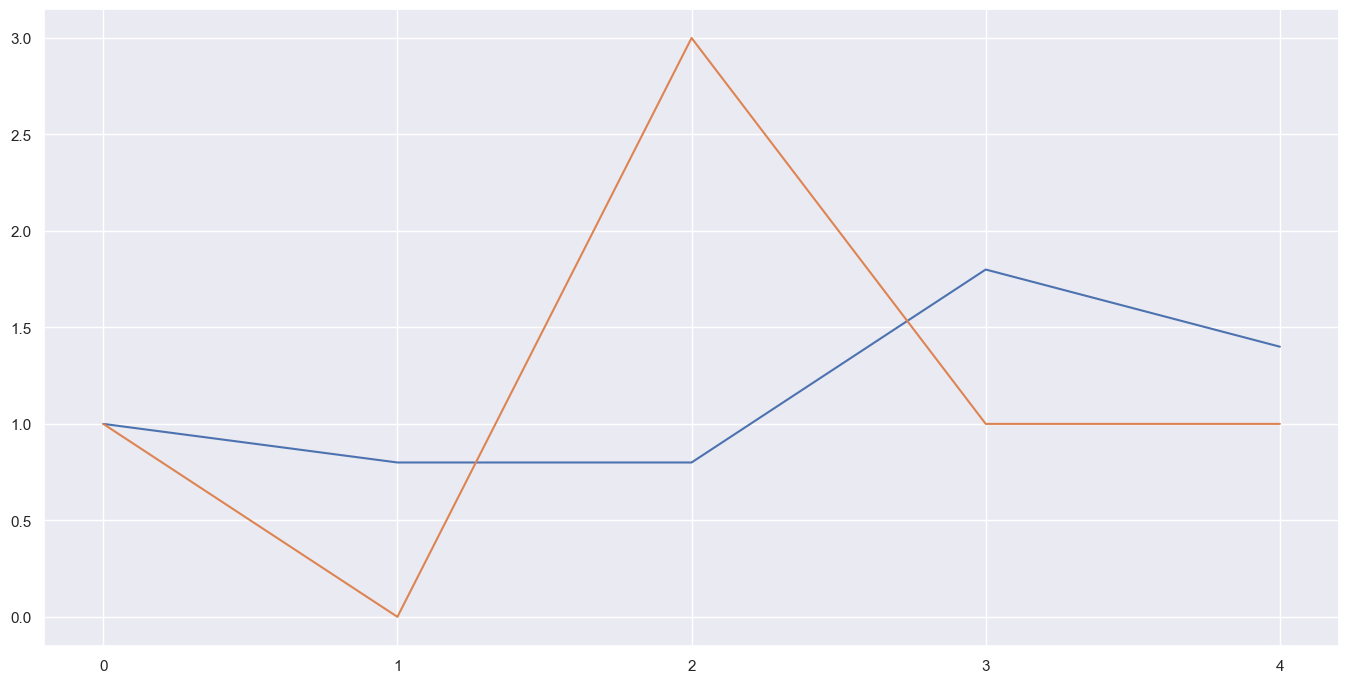

In [12]:
sns.set(rc={'figure.figsize':(16.7,8.27)})
sns.lineplot(x=range(len(soc.courts)), y=[np.average(dist_to_others[c]) for c in soc.courts])

sns.lineplot(x=list(map(str, range(len(soc.courts)))), y=[dist_to_case_base[c] for c in soc.courts])